In [186]:
import pandas as pd
import numpy as np

# Let's read in the datasets.

sample = pd.read_csv('Inputs/sampleSubmission.csv')
spray = pd.read_csv('Inputs/spray.csv')
weather = pd.read_csv('Inputs/weather.csv')
train = pd.read_csv('Inputs/train.csv')
test = pd.read_csv('Inputs/test.csv')

In [187]:
sample.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [188]:
test.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [189]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [31]:
sample.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [190]:
# Our dependent variable is the presence of West Nile Virus.
y = train['WnvPresent']

In [561]:
# The spray data come from two years: 2011 and 2013.

In [69]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [340]:
spray.tail()

,Date,Time,Latitude,Longitude
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423
14834,2013-09-05,8:35:41 PM,42.004805,-87.817460


In [322]:
sprays2011 = spray.loc[spray['Date'] < '2012', :].shape[0]
sprays2011

2209

In [562]:
# There was a significant outbreak of West Nile in 2012, leading to the
# more protracted spraying campaign in 2013 relative to 2011.

In [323]:
sprays2013 = spray.loc[spray['Date'] > '2012', :].shape[0]
sprays2013

12626

In [563]:
# Simple dataframe for the sake of visualization

In [339]:
spraydf = pd.DataFrame([[2011, sprays2011], [2013, sprays2013]], columns = ['Year', 'Sprays'])
spraydf

,Year,Sprays
0,2011,2209
1,2013,12626


In [34]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [158]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [36]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [37]:
weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [5]:
train['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [314]:
train.loc[train['Species'] == 'CULEX TERRITANS', 'WnvPresent'].sum()

0

In [315]:
train.loc[train['Species'] == 'CULEX SALINARIUS', 'WnvPresent'].sum()

0

In [316]:
train.loc[train['Species'] == 'CULEX TARSALIS', 'WnvPresent'].sum()

0

In [317]:
train.loc[train['Species'] == 'CULEX ERRATICUS', 'WnvPresent'].sum()

0

In [560]:
# Culex pipiens and Culex restuans are not only the dominant species in
# our dataset but also the only two carriers of the disease.
# Let's dummy out species.

In [191]:
spec_dums = pd.get_dummies(train['Species'])

In [192]:
spec_dums.columns

Index(['CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS',
       'CULEX TERRITANS'],
      dtype='object')

In [193]:
train_with_dums = pd.concat([train, spec_dums], axis = 1)

In [8]:
train_with_dums.corr()['WnvPresent'].nlargest(5)

WnvPresent                1.000000
NumMosquitos              0.196820
CULEX PIPIENS             0.096206
Latitude                  0.028697
CULEX PIPIENS/RESTUANS    0.010960
Name: WnvPresent, dtype: float64

In [204]:
train_with_dums['NumMosquitos'].mean()

12.853512278697886

In [559]:
# I'm going to construct a new pipiens and a new restuans category, adding
# in the number from the hybrid-value species of 'CULEX PIPIENS/RESTUANS'.

In [194]:
train_with_dums['new_pip'] = train_with_dums['CULEX PIPIENS'] + train_with_dums['CULEX PIPIENS/RESTUANS']

In [195]:
train_with_dums['new_rest'] = train_with_dums['CULEX RESTUANS'] + train_with_dums['CULEX PIPIENS/RESTUANS']

In [196]:
train_adj_dums = train_with_dums.drop(['CULEX RESTUANS', 'CULEX PIPIENS',
                                       'CULEX PIPIENS/RESTUANS', 'Species'],
                                      axis = 1)

In [197]:
# Let's dummy out traps as well.
trap_dums = pd.get_dummies(train_adj_dums['Trap'])

In [198]:
train_traps = pd.concat([train_adj_dums, trap_dums], axis = 1)

In [10]:
train_traps.corr()['WnvPresent'].nlargest(10)

WnvPresent      1.000000
NumMosquitos    0.196820
new_pip         0.104574
T900            0.044220
T143            0.034433
T003            0.030296
Latitude        0.028697
T233            0.027159
T002            0.026936
T006            0.024517
Name: WnvPresent, dtype: float64

In [12]:
(train_traps.corr()['WnvPresent'] > 0.3).sum()

1

In [564]:
# It will be helpful to have 'Date' in a more usable format.

In [199]:
train_traps['Date'] = pd.to_datetime(train_traps['Date'])

In [15]:
train_traps.loc[train_traps['Address'] == '6200 North Mandell Avenue, Chicago, IL 60646, USA',
                ['Date', 'new_pip']]

,Date,new_pip
2,2007-05-29,0
88,2007-06-26,1
89,2007-06-26,0
203,2007-07-02,1
204,2007-07-02,0
278,2007-07-11,1
430,2007-07-18,0
431,2007-07-18,1
696,2007-07-27,1
782,2007-08-01,1


## Combining Weather and Train

I add in the nearer station here (O'Hare or Midway). I can't now find the reference, but someone on Kaggle pointed out that it's useful to convert the longitude measures. Since Chicago is significantly far north, a degree of longitude there represents significantly less distance there than does a degree of latitude.

In [200]:
ord_lat = 41.995
ord_long = -87.933

In [201]:
mdw_lat = 41.786
mdw_long = -87.752

In [202]:
# Here's the fancy footwork: Convert latitude to radians, take
# the cosine of that angle, and then multiply the difference in
# longitudes by that value.

train_traps['Station'] = np.where((train_traps['Latitude'] - ord_lat) ** 2 + (np.cos(np.pi / 180 * train_traps['Latitude']) * (train_traps['Longitude'] - ord_long)) ** 2 < (train_traps['Latitude'] - mdw_lat) ** 2 + (np.cos(np.pi / 180 * train_traps['Latitude']) * (train_traps['Longitude'] - ord_long)) ** 2, 1, 2)

In [203]:
train_dates = list(train_traps['Date'])

In [204]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [205]:
match_dates = list(set(train_traps['Date']).intersection(set(weather['Date'])))

In [206]:
len(match_dates)

95

In [207]:
train_traps['Date'].unique().shape[0]

95

In [208]:
# Since we now have both 'Date' and 'Station' in our training data,
# we can merge the two data frames on those columns.

train_weath = pd.merge(train_traps, weather, how = 'left', on = ['Date', 'Station'])

In [175]:
train_weath.loc[(train_weath['Station'] == 2) & (train_weath['Date'] == pd.to_datetime('2007-05-29'))]

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
13,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
14,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
15,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
16,2007-05-29,"1700 West 95th Street, Chicago, IL 60643, USA",17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,3,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
17,2007-05-29,"2200 West 89th Street, Chicago, IL 60643, USA",22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,5,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
18,2007-05-29,"2200 West 89th Street, Chicago, IL 60643, USA",22,W 89TH ST,T096,"2200 W 89TH ST, Chicago, IL",41.731922,-87.677512,8,1,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
24,2007-05-29,"8900 South Carpenter Street, Chicago, IL 60620...",89,S CARPENTER ST,T159,"8900 S CARPENTER ST, Chicago, IL",41.732984,-87.649642,8,1,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [176]:
weather.loc[weather['Date'] == pd.to_datetime('2007-05-29')]

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
56,1,2007-05-29,88,60,74,10,58,65,0,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
57,2,2007-05-29,88,65,77,M,59,66,0,12,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [27]:
# Let's look at weather correlations with the virus.
train_weath.corr()['WnvPresent']

Block               0.004877
Latitude            0.028697
Longitude          -0.060345
AddressAccuracy     0.008064
NumMosquitos        0.196820
WnvPresent          1.000000
CULEX ERRATICUS    -0.002295
CULEX SALINARIUS   -0.021373
CULEX TARSALIS     -0.005624
CULEX TERRITANS    -0.034566
new_pip             0.104574
new_rest           -0.077339
T001               -0.008896
T002                0.026936
T003                0.030296
T004               -0.007956
T005                0.014815
T006                0.024517
T007               -0.011020
T008                0.010127
T009                0.013273
T011                0.015371
T012               -0.006468
T013                0.019605
T014                0.019417
T015                0.016038
T016                0.019122
T017               -0.020347
T018               -0.018273
T019               -0.011020
                      ...   
T212               -0.017778
T215                0.004184
T218               -0.009604
T219          

In [28]:
weather.dtypes

Station                 int64
Date           datetime64[ns]
Tmax                    int64
Tmin                    int64
Tavg                   object
Depart                 object
DewPoint                int64
WetBulb                object
Heat                   object
Cool                   object
Sunrise                object
Sunset                 object
CodeSum                object
Depth                  object
Water1                 object
SnowFall               object
PrecipTotal            object
StnPressure            object
SeaLevel               object
ResultSpeed           float64
ResultDir               int64
AvgSpeed               object
dtype: object

In [209]:
# Let's make Tavg and integer.
train_weath['Tavg_int'] = train_weath['Tavg'].map(lambda x: int(x))

Many of the weather data have 'M's instead of NaNs ('M' for "missing"). Since NaNs are easier to work with, let's replace them, at least where they aren't so numerous as to make the feature irrelevant.

In [23]:
(train_weath['Depart'] == 'M').sum()

5933

In [210]:
(train_weath['WetBulb'] == 'M').sum()

49

In [211]:
train_weath['WetBulb'].replace('M', np.nan, inplace = True)

In [26]:
train_weath['WetBulb'].isnull().sum()

49

In [212]:
train_weath['WetBulb'] = train_weath['WetBulb'].map(lambda x: int(x), na_action = 'ignore')

In [28]:
(train_weath['Heat'] == 'M').sum()

0

In [21]:
train_weath['Heat'] = train_weath['Heat'].map(lambda x: int(x))

In [30]:
(train_weath['Cool'] == 'M').sum()

0

In [22]:
train_weath['Cool'] = train_weath['Cool'].map(lambda x: int(x))

In [32]:
train_weath['Sunrise'].value_counts()

-       5933
0416     332
0445     265
0417     201
0459     200
0528     185
0438     165
0419     159
0418     150
0451     146
0426     143
0440      90
0433      89
0505      85
0429      85
0506      82
0427      81
0552      81
0514      79
0509      78
0431      78
0452      76
0442      74
0522      74
0432      71
0541      70
0535      70
0542      69
0533      68
0444      65
0449      63
0520      63
0536      60
0456      60
0532      58
0424      58
0503      57
0437      57
0530      57
0540      57
0423      55
0510      53
0425      50
0457      49
0511      46
0420      46
0421      39
0547      39
0517      38
0543      37
0548      27
0512      25
0518      25
0428      20
0519      15
0453       3
0446       3
0557       1
0521       1
Name: Sunrise, dtype: int64

In [40]:
train_weath['Sunset'].value_counts()

-       5933
1931     397
1928     308
1911     265
1854     200
1809     185
1929     165
1918     165
1923     159
1930     153
1904     146
1926     130
1917     106
1924     106
1845      85
1843      82
1729      81
1832      79
1925      78
1840      78
1903      76
1819      74
1915      74
1756      70
1746      70
1744      69
1758      68
1927      68
1913      65
1907      63
1822      63
1755      60
1858      60
1760      58
1848      57
1748      57
1919      57
1805      57
1839      53
1856      49
1837      46
1920      40
1735      39
1827      38
1742      37
1734      27
1835      25
1826      25
1916      23
1824      15
1921      14
1910       3
1902       3
1821       1
1720       1
Name: Sunset, dtype: int64

In [41]:
train_weath['CodeSum'].value_counts()

                         5834
RA                        695
RA BR                     615
BR                        387
HZ                        365
TSRA RA BR                346
TS TSRA RA BR             319
BR HZ                     277
RA BR HZ                  227
TSRA RA                   224
TSRA BR                   134
RA DZ BR                  125
VCTS                       98
TS                         95
TSRA RA DZ BR HZ           93
TSRA                       88
TS BR                      87
TSRA RA BR VCTS            71
FG BR HZ                   64
TS TSRA RA VCTS            64
TS TSRA RA BR HZ VCTS      58
TS TSRA RA FG BR HZ        56
TSRA HZ                    50
TSRA BR HZ VCTS            45
TS TSRA BR                 45
TSRA BR HZ                 23
TS TSRA BR HZ              17
DZ BR                       2
TS TSRA RA                  2
Name: CodeSum, dtype: int64

In [42]:
train_weath['Depth'].value_counts()

M    5933
0    4573
Name: Depth, dtype: int64

In [43]:
train_weath['Water1'].value_counts()

M    10506
Name: Water1, dtype: int64

In [44]:
train_weath['SnowFall'].value_counts()

M      5933
0.0    4478
  T      95
Name: SnowFall, dtype: int64

In [45]:
train_weath['PrecipTotal'].value_counts()

0.00    5962
  T      867
0.23     264
0.01     259
0.06     218
0.09     182
0.16     166
0.83     163
0.36     151
0.02     141
0.88     137
0.84     117
0.03     114
0.20     108
0.08     100
0.92     100
0.58      87
1.31      86
0.12      83
0.17      79
0.24      78
0.39      76
0.70      74
1.55      71
0.13      70
0.11      63
0.33      60
0.59      58
0.50      58
0.14      57
0.79      53
0.87      48
3.97      45
0.52      45
0.42      38
0.19      36
1.19      29
0.89      27
0.04      26
0.95      25
0.46      23
0.27      22
M         18
0.44      17
0.05       3
0.37       2
Name: PrecipTotal, dtype: int64

In [46]:
(train_weath['StnPressure'] == 'M').sum()

49

In [23]:
train_weath['StnPressure'].replace('M', np.nan, inplace = True)

In [24]:
train_weath['StnPressure'] = train_weath['StnPressure'].map(lambda x: float(x))

In [49]:
(train_weath['SeaLevel'] == 'M').sum()

0

In [25]:
train_weath['SeaLevel'] = train_weath['SeaLevel'].map(lambda x: float(x))

In [51]:
(train_weath['AvgSpeed'] == 'M').sum()

0

In [26]:
train_weath['AvgSpeed'] = train_weath['AvgSpeed'].map(lambda x: float(x))

In [53]:
train_weath.corr()['WnvPresent']

Block               0.004877
Latitude            0.028697
Longitude          -0.060345
AddressAccuracy     0.008064
NumMosquitos        0.196820
WnvPresent          1.000000
CULEX ERRATICUS    -0.002295
CULEX SALINARIUS   -0.021373
CULEX TARSALIS     -0.005624
CULEX TERRITANS    -0.034566
new_pip             0.104574
new_rest           -0.077339
T001               -0.008896
T002                0.026936
T003                0.030296
T004               -0.007956
T005                0.014815
T006                0.024517
T007               -0.011020
T008                0.010127
T009                0.013273
T011                0.015371
T012               -0.006468
T013                0.019605
T014                0.019417
T015                0.016038
T016                0.019122
T017               -0.020347
T018               -0.018273
T019               -0.011020
                      ...   
T223                0.020906
T224               -0.010939
T225                0.024259
T226          

In [54]:
train_weath.corr()['WnvPresent'].nlargest(10)

WnvPresent      1.000000
NumMosquitos    0.196820
new_pip         0.104574
DewPoint        0.086935
WetBulb         0.080664
Tmin            0.067305
Tavg_int        0.061432
Cool            0.054443
Tmax            0.048352
T900            0.044220
Name: WnvPresent, dtype: float64

#### Maybe include DewPoint, WetBulb.

### A closer look at the traps of pipiens

In [58]:
pip_df = train_weath.loc[(train_weath['new_pip'] == 1) & (train_weath['WnvPresent'] == 1)]

In [76]:
pip_df.sort_values(by ='NumMosquitos', ascending = False)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int
553,2007-07-18,"3800 East 115th Street, Chicago, IL 60617, USA",38,E 115TH ST,T215,"3800 E 115TH ST, Chicago, IL",41.686398,-87.531635,8,50,...,M,M,M,0.92,29.18,29.83,10.3,24,10.6,77
3039,2007-09-06,"South Stony Island Avenue, Chicago, IL, USA",10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,50,...,M,M,M,0.08,29.27,29.91,12.8,20,13.0,79
7308,2011-08-12,"ORD Terminal 5, O'Hare International Airport, ...",10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,...,0,M,0.0,0.00,29.22,29.94,8.3,19,8.5,71
603,2007-07-25,"South Doty Avenue, Chicago, IL, USA",12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,50,...,M,M,M,0.00,29.35,29.99,6.4,23,7.0,77
10124,2013-09-06,"ORD Terminal 5, O'Hare International Airport, ...",10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,...,0,M,0.0,0.00,29.38,30.11,4.7,20,6.0,72
7062,2011-07-29,"5100 North Mont Clare Avenue, Chicago, IL 6065...",51,N MONT CLARE AVE,T223,"5100 N MONT CLARE AVE, Chicago, IL",41.973845,-87.805059,9,50,...,0,M,0.0,0.70,29.28,29.98,4.3,4,5.9,79
10122,2013-09-06,"ORD Terminal 5, O'Hare International Airport, ...",10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,...,0,M,0.0,0.00,29.38,30.11,4.7,20,6.0,72
6961,2011-07-29,"5000 South Central Avenue, Chicago, IL 60638, USA",50,S CENTRAL AVE,T031,"5000 S CENTRAL AVE, Chicago, IL",41.801498,-87.763416,9,50,...,M,M,M,0.36,29.34,29.96,3.5,4,5.6,80
5509,2009-08-25,"Ohare Court, Bensenville, IL 60106, USA",10,W OHARE,T903,"1000 W OHARE, Chicago, IL",41.957799,-87.930995,5,50,...,0,M,0.0,0.00,29.33,30.05,9.1,21,9.2,71
5497,2009-08-25,"ORD Terminal 5, O'Hare International Airport, ...",10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,50,...,0,M,0.0,0.00,29.33,30.05,9.1,21,9.2,71


In [78]:
pip_df.loc[pip_df['NumMosquitos'] >= 50, :].shape[0]

107

In [82]:
pip_df.loc[pip_df['NumMosquitos'] >= 50, :]['Trap'].value_counts()

T115    31
T900    16
T138    14
T128     7
T135     5
T103     5
T233     4
T008     3
T002     3
T221     3
T054     2
T030     2
T903     2
T016     2
T158     1
T220     1
T086     1
T215     1
T223     1
T225     1
T096     1
T031     1
Name: Trap, dtype: int64

#### Certain traps to monitor? T115, T900, and T138 stand out. Let's plan to throw those into our models.

## Combining Spray and Train

In [60]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [21]:
train_weath['Spray?'] = 0

In [565]:
# What follows here was a good idea in theory but not in practice,
# because of the high computation time required. The idea was to round
# latitudes and longitudes and then run through those categories in each
# set looking for intersections, checking also to see that the trap date
# was earlier than the spray date.

# A less complex (but successful) version of this was employed later.

In [22]:
# train_weath['LatitudeRounded'] = round(train_weath['Latitude'], 3)

In [23]:
# train_weath['LongitudeRounded'] = round(train_weath['Longitude'], 3)

In [24]:
# spray['LatitudeRounded'] = round(spray['Latitude'], 3)

In [25]:
# spray['LongitudeRounded'] = round(spray['Longitude'], 3)

In [26]:
# train_spray = pd.merge(train_weath, spray, how = 'left', on = ['LatitudeRounded', 'LongitudeRounded'])

# train_spray.shape

# train_spray['Spray?'] = np.where(train_spray['Date_x'] > pd.to_datetime(train_spray['Date_y']), 1, 0)

# train_spray['Spray?'].sum()

# train_spray.loc[train_spray['Spray?'] == 1, 'WnvPresent'].sum()

In [21]:
# string_dates = [str(date) for date in train_weath['Date']]

In [2]:
# train_weath['StringDate'] = string_dates

In [3]:
# train_weath_2011 = train_weath.loc[(train_weath['StringDate'] >= '2011') & (train_weath['StringDate'] < '2013')]

In [30]:
# train_weath_2011['StringDate']

6060    2011-06-10 00:00:00
6061    2011-06-10 00:00:00
6062    2011-06-10 00:00:00
6063    2011-06-10 00:00:00
6064    2011-06-10 00:00:00
6065    2011-06-10 00:00:00
6066    2011-06-10 00:00:00
6067    2011-06-10 00:00:00
6068    2011-06-10 00:00:00
6069    2011-06-10 00:00:00
6070    2011-06-10 00:00:00
6071    2011-06-10 00:00:00
6072    2011-06-10 00:00:00
6073    2011-06-10 00:00:00
6074    2011-06-10 00:00:00
6075    2011-06-10 00:00:00
6076    2011-06-10 00:00:00
6077    2011-06-10 00:00:00
6078    2011-06-10 00:00:00
6079    2011-06-10 00:00:00
6080    2011-06-10 00:00:00
6081    2011-06-10 00:00:00
6082    2011-06-10 00:00:00
6083    2011-06-10 00:00:00
6084    2011-06-10 00:00:00
6085    2011-06-10 00:00:00
6086    2011-06-10 00:00:00
6087    2011-06-10 00:00:00
6088    2011-06-10 00:00:00
6089    2011-06-10 00:00:00
               ...         
8084    2011-09-30 00:00:00
8085    2011-09-30 00:00:00
8086    2011-09-30 00:00:00
8087    2011-09-30 00:00:00
8088    2011-09-30 0

In [24]:
# train_weath_2013 = train_weath.loc[(train_weath['StringDate'] >= '2013') & (train_weath['StringDate'] < '2014')]

In [25]:
# train_weath_pre = train_weath.loc[train_weath['StringDate'] < '2011']

In [26]:
# spray_2011 = spray.loc[(spray['Date'] > '2010') & (spray['Date'] < '2012')]

In [33]:
# spray_2011.shape[0]

2209

In [27]:
# spray_2013 = spray.loc[(spray['Date'] > '2012') & (spray['Date'] < '2014')]

In [35]:
# spray_2013.shape[0]

12626

In [36]:
# train_weath_2011.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Spray?,StringDate
6060,2011-06-10,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,...,0.0,0.52,29.21,29.94,6.4,3,8.0,60,0,2011-06-10 00:00:00


In [37]:
# for i in range(spray_2011.shape[0]):
 #   for j in range(6060, 6060 + train_weath_2011.shape[0]):
  #     if (round(train_weath_2011['Latitude'][j], 2) == round(spray_2011['Latitude'][i], 2)) and (round(train_weath_2011['Longitude'][j], 2) == round(spray_2011['Longitude'][i], 2)) and (train_weath_2011['Date'][j] < pd.to_datetime(spray_2011['Date'][i])):
      #      train_weath_2011['Spray?'][j] = 1

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gadamico/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
# train_weath_2013.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Spray?,StringDate
8114,2013-06-07,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,19,...,0.0,T,29.20,29.92,9.5,3,9.9,60,0,2013-06-07 00:00:00


In [39]:
# spray_2013.head(1)

,Date,Time,Latitude,Longitude
2209,2013-07-17,7:45:45 PM,41.997728,-87.767532


In [41]:
# for i in range(2209, 2209 + int(spray_2013.shape[0] / 4)):
#    for j in range(8114, 8114 + train_weath_2013.shape[0]):
 #       if (round(train_weath_2013['Latitude'][j], 2) == round(spray_2013['Latitude'][i], 2)) and (round(train_weath_2013['Longitude'][j], 2) == round(spray_2013['Longitude'][i], 2)) and (train_weath_2013['Date'][j] < pd.to_datetime(spray_2013['Date'][i])):
  #          train_weath_2013['Spray?'][j] = 1

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gadamico/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
# for i in range(2209 + int(spray_2013.shape[0] / 4), 2209 + int(spray_2013.shape[0] / 2)):
  #  for j in range(8114, 8114 + train_weath_2013.shape[0]):
   #     if (round(train_weath_2013['Latitude'][j], 2) == round(spray_2013['Latitude'][i], 2)) and (round(train_weath_2013['Longitude'][j], 2) == round(spray_2013['Longitude'][i], 2)) and (train_weath_2013['Date'][j] < pd.to_datetime(spray_2013['Date'][i])):
    #        train_weath_2013['Spray?'][j] = 1

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gadamico/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
# for i in range(2209 + int(spray_2013.shape[0] / 2), 2209 + int(spray_2013.shape[0] * 3 / 4)):
  #  for j in range(8114, 8114 + train_weath_2013.shape[0]):
   #     if (round(train_weath_2013['Latitude'][j], 2) == round(spray_2013['Latitude'][i], 2)) and (round(train_weath_2013['Longitude'][j], 2) == round(spray_2013['Longitude'][i], 2)) and (train_weath_2013['Date'][j] < pd.to_datetime(spray_2013['Date'][i])):
    #        train_weath_2013['Spray?'][j] = 1

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gadamico/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [44]:
# for i in range(2209 + int(spray_2013.shape[0] * 3 / 4), 2209 + int(spray_2013.shape[0])):
  #  for j in range(8114, 8114 + train_weath_2013.shape[0]):
   #     if (round(train_weath_2013['Latitude'][j], 2) == round(spray_2013['Latitude'][i], 2)) and (round(train_weath_2013['Longitude'][j], 2) == round(spray_2013['Longitude'][i], 2)) and (train_weath_2013['Date'][j] < pd.to_datetime(spray_2013['Date'][i])):
    #        train_weath_2013['Spray?'][j] = 1

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/gadamico/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
# train_weath['Spray?'].value_counts()

0    10396
1      110
Name: Spray?, dtype: int64

In [66]:
train_weath['WnvPresent'].sum()

551

In [65]:
train_weath.loc[train_weath['Spray?'] == 1, 'WnvPresent'].sum()

11

In [28]:
# new_train_weath = pd.concat([train_weath_pre, train_weath_2011, train_weath_2013])

In [98]:
# new_train_weath.shape[0]

10506

### ZIP Codes

In [61]:
# Let's isolate Zip codes for further analysis.

# add_list = [add.split(' ') for add in new_train_weath['Address']]

In [213]:
add_list = [add.split(' ') for add in train_weath['Address']]

In [32]:
add_list[0]

['4100', 'North', 'Oak', 'Park', 'Avenue,', 'Chicago,', 'IL', '60634,', 'USA']

In [73]:
new_train_weath.iloc[new_train_weath.index == 9450]['Address']

9450    Chicago Midway International Airport (MDW), 52...
Name: Address, dtype: object

In [77]:
add_list[9450][-2]

'60638,'

In [64]:
# new_train_weath['ZIP'] = [item[-2] for item in add_list]

In [214]:
train_weath['ZIP'] = [item[-2] for item in add_list]

In [204]:
new_train_weath.loc[new_train_weath['ZIP'] == 'IL,']

,Address,AddressAccuracy,AddressNumberAndStreet,AvgSpeed,Block,CULEX ERRATICUS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS,CodeSum,...,Tavg_int,Tmax,Tmin,Trap,Water1,WetBulb,WnvPresent,ZIP,new_pip,new_rest
58,"South Vincennes Avenue, Chicago, IL, USA",5,"1000 S VINCENNES, Chicago, IL",8.1,10,0,0,0,0,RA BR,...,57,63,51,T089,M,52.0,0,"IL,",0,1
69,"Chicago, IL, USA",3,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",8.1,43,0,0,0,0,RA BR,...,57,63,51,T145,M,52.0,0,"IL,",0,1
127,"Chicago, IL, USA",3,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",8.1,43,0,0,0,0,BR HZ,...,82,91,73,T145,M,72.0,0,"IL,",0,1
172,"South Vincennes Avenue, Chicago, IL, USA",5,"1000 S VINCENNES, Chicago, IL",8.2,10,0,0,0,0,,...,64,71,56,T089,M,60.0,0,"IL,",0,1
179,"Chicago, IL, USA",3,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",8.2,43,0,0,0,0,,...,64,71,56,T145,M,60.0,0,"IL,",0,1
193,"6400 West Strong Street, Chicago, IL, USA",8,"6400 W STRONG ST, Chicago, IL",8.3,64,0,0,0,0,,...,63,70,56,T014,M,59.0,0,"IL,",0,1
228,"South Vincennes Avenue, Chicago, IL, USA",5,"1000 S VINCENNES, Chicago, IL",8.5,10,0,0,0,0,,...,68,77,58,T089,M,59.0,0,"IL,",1,1
237,"Chicago, IL, USA",3,"4300 N ASHLAND AVE OVERPASS, Chicago, IL",8.5,43,0,1,0,0,,...,68,77,58,T145,M,59.0,0,"IL,",0,0
265,"6400 West Strong Street, Chicago, IL, USA",8,"6400 W STRONG ST, Chicago, IL",8.1,64,0,0,0,0,,...,66,79,53,T014,M,58.0,0,"IL,",1,1
266,"6400 West Strong Street, Chicago, IL, USA",8,"6400 W STRONG ST, Chicago, IL",8.1,64,0,0,0,0,,...,66,79,53,T014,M,58.0,0,"IL,",0,1


Ugh. Can we do anything about this, short of looking up a bunch of ZIP codes for these addresses? This may be connected with the address accuracy issue.

N.B. I did fill in a few of these later, but it would be nice to finish this work.

#### Brief Look at Correlation of ZIP code with West Nile

In [215]:
# zip_dums = pd.get_dummies(new_train_weath['ZIP'])
zip_dums = pd.get_dummies(train_weath['ZIP'])

In [217]:
# zip_wnv = pd.concat([zip_dums, new_train_weath['WnvPresent']], axis = 1)
zip_wnv = pd.concat([zip_dums, train_weath['WnvPresent']], axis = 1)

In [103]:
zip_wnv.corr()['WnvPresent'].nlargest(10)

WnvPresent    1.000000
60631,        0.050722
60666,        0.044220
60656,        0.028427
60621,        0.020895
60652,        0.017227
60634,        0.015357
60630,        0.014368
60633,        0.012997
60659,        0.011652
Name: WnvPresent, dtype: float64

In [218]:
# train_zip = pd.concat([new_train_weath, zip_dums], axis = 1)
train_zip = pd.concat([train_weath, zip_dums], axis = 1)

#### Brief Interlude to look for high-traffic ZIP codes

In [69]:
pip_df = train_zip.loc[(train_zip['new_pip'] == 1) & (train_weath['WnvPresent'] == 1)]

In [70]:
pip_df.loc[pip_df['NumMosquitos'] == 50, :]['ZIP'].value_counts()

IL,       45
60666,    16
60617,    13
60631,     6
60803,     5
60633,     3
60634,     3
60646,     3
60643,     2
60614,     2
60651,     2
60106,     2
60625,     1
60652,     1
60656,     1
60655,     1
60638,     1
Name: ZIP, dtype: int64

#### Interlude over

In [105]:
train_zip.corr()['WnvPresent']

AddressAccuracy     0.008064
Block               0.004877
CULEX ERRATICUS    -0.002295
CULEX SALINARIUS   -0.021373
CULEX TARSALIS     -0.005624
CULEX TERRITANS    -0.034566
DewPoint            0.086935
Latitude            0.028697
Longitude          -0.060345
NumMosquitos        0.196820
ResultDir           0.001707
ResultSpeed        -0.045420
Spray?              0.062404
Station            -0.040617
T001               -0.008896
T002                0.026936
T003                0.030296
T004               -0.007956
T005                0.014815
T006                0.024517
T007               -0.011020
T008                0.010127
T009                0.013273
T011                0.015371
T012               -0.006468
T013                0.019605
T014                0.019417
T015                0.016038
T016                0.019122
T017               -0.020347
                      ...   
60629,             -0.000697
60630,              0.014368
60631,              0.050722
60632,        

In [80]:
train_zip.corr()['new_rest'].nlargest(10)

new_rest        1.000000
ResultSpeed     0.124120
NumMosquitos    0.096244
Spray?          0.080112
T232            0.030201
T083            0.027376
Block           0.026312
T218            0.026162
60641,          0.026162
T144            0.025311
Name: new_rest, dtype: float64

60631, 60666 (O'Hare) small correlations.

In [106]:
# This set may be worth preserving for future use.

train_zip.to_csv('Inputs/pre_pro_train_mdl1.csv')

In [37]:
# train_zip = pd.read_csv('Inputs/pre_pro_train_mdl1.csv')

## Correlate WestNile ZIP Codes by Year

Since there is quite a bit of variability by year, it may be worthwhile to construct a list of ZIP codes that were relevant in _any_ year.

In [197]:
train_weath_2007 = train_weath_pre.loc[train_weath_pre['Date'] < '2009']

In [198]:
train_weath_2009 = train_weath_pre.loc[train_weath_pre['Date'] > '2008']

In [207]:
train_weath_2007_wnv = train_weath_2007.loc[train_weath_2007['WnvPresent'] == 1]

train_weath_2007_wnv['ZIP'].value_counts().nlargest(8)

IL,       61
60617,    25
60634,    20
60631,    17
60643,    16
60609,    14
60638,     9
60656,     7
Name: ZIP, dtype: int64

#### 2007: 60617, 60634, 60631, 60643, 60609

In [213]:
train_weath_2007_wnv.shape[0]

236

In [208]:
train_weath_2009_wnv = train_weath_2009.loc[train_weath_2009['WnvPresent'] == 1]

train_weath_2009_wnv['ZIP'].value_counts().nlargest(8)

60655,    3
60106,    2
60666,    2
60634,    2
60633,    1
60622,    1
60639,    1
60652,    1
Name: ZIP, dtype: int64

#### 2009: 60655, 60106, 60666, 60634

In [212]:
train_weath_2009_wnv.shape[0]

19

In [210]:
train_weath_2011_wnv = train_weath_2011.loc[train_weath_2011['WnvPresent'] == 1]

add_list = [add.split(' ') for add in train_weath_2011_wnv['Address']]

train_weath_2011_wnv['ZIP'] = [item[-2] for item in add_list]

train_weath_2011_wnv['ZIP'].value_counts().nlargest(8)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


60666,    18
60106,     8
60656,     5
60630,     3
60632,     2
60646,     2
60639,     2
60652,     2
Name: ZIP, dtype: int64

#### 2011: 60666, 60106

In [214]:
train_weath_2011_wnv.shape[0]

57

In [216]:
train_weath_2013_wnv = train_weath_2013.loc[train_weath_2013['WnvPresent'] == 1]

add_list = [add.split(' ') for add in train_weath_2013_wnv['Address']]

train_weath_2013_wnv['ZIP'] = [item[-2] for item in add_list]

train_weath_2013_wnv['ZIP'].value_counts().nlargest(10)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


60666,    46
IL,       16
60651,    13
60646,    13
60639,    11
60634,    11
60638,    10
60618,     9
60652,     8
60621,     7
Name: ZIP, dtype: int64

#### 2013: 60666

In [215]:
train_weath_2013_wnv.shape[0]

239

## Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [220]:
train_zip.columns

Index(['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       ...
       '60654,', '60655,', '60656,', '60659,', '60660,', '60666,', '60707,',
       '60803,', '60827,', 'IL,'],
      dtype='object', length=227)

In [221]:
# First model.
columns = ['new_pip', 'new_rest', 'T115', 'T138', 'T900', 'Station',
          'Tavg_int', 'WetBulb', 'DewPoint', '60631,', '60666,']

In [222]:
X = train_zip[columns]

In [223]:
X.isnull().sum()

new_pip      0
new_rest     0
T115         0
T138         0
T900         0
Station      0
Tavg_int     0
WetBulb     49
DewPoint     0
60631,       0
60666,       0
dtype: int64

In [224]:
X['WetBulb'].fillna(0, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [226]:
model1 = logreg.fit(X_train, y_train)

In [227]:
logreg.score(X_test, y_test)

0.9489912447658927

#### Preparing the Test Set

In [145]:
test = pd.read_csv('Inputs/test.csv')

In [66]:
test.iloc[test.index == 67000]

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
67000,67001,2010-10-01,"4200 West 65th Street, Chicago, IL 60621, USA",CULEX RESTUANS,42,W 65TH ST,T235,"4200 W 65TH ST, Chicago, IL",41.776428,-87.627096,8


In [228]:
# Dummies for species, traps; merging weather
spec_dums_t = pd.get_dummies(test['Species'])

test_with_dums = pd.concat([test, spec_dums_t], axis = 1)

test_with_dums['new_pip'] = test_with_dums['CULEX PIPIENS'] + test_with_dums['CULEX PIPIENS/RESTUANS']

test_with_dums['new_rest'] = test_with_dums['CULEX RESTUANS'] + test_with_dums['CULEX PIPIENS/RESTUANS']

test_dums_t = pd.get_dummies(test_with_dums['Trap'])

test_traps = pd.concat([test_with_dums, test_dums_t], axis = 1)

test_traps['Date'] = pd.to_datetime(test_traps['Date'])

test_traps['Station'] = np.where((test_traps['Latitude'] - ord_lat) ** 2 + (np.cos(np.pi / 180 * test_traps['Latitude']) * (test_traps['Longitude'] - ord_long)) ** 2 < (test_traps['Latitude'] - mdw_lat) ** 2 + (np.cos(np.pi / 180 * test_traps['Latitude']) * (test_traps['Longitude'] - ord_long)) ** 2, 1, 2)

test_weath = pd.merge(test_traps, weather, how = 'left', on = ['Date', 'Station'])

test_weath['Tavg_int'] = test_weath['Tavg'].map(lambda x: int(x), na_action = 'ignore')

test_weath['WetBulb'].replace('M', np.nan, inplace = True)

test_weath['WetBulb'] = test_weath['WetBulb'].map(lambda x: int(x), na_action = 'ignore')

test_weath['Spray?'] = 0

In [125]:
spray_2011.head(1)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163


In [126]:
spray_2013.head(1)

,Date,Time,Latitude,Longitude
2209,2013-07-17,7:45:45 PM,41.997728,-87.767532


This is where my first effort to encode spray data into my models really fell apart.

In [45]:
# test_weath_2008 = test_weath.loc[(test_weath['Date'] < '2009')]

In [46]:
# test_weath_2010 = test_weath.loc[(test_weath['Date'] < '2011') & (test_weath['Date'] > '2009')]
# test_weath_2010.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Spray?
30498,30499,2010-06-02,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,M,0.0,1.02,29.00,29.71,3.6,34,8.7,67,0


In [47]:
# test_weath_2012 = test_weath.loc[(test_weath['Date'] < '2013') & (test_weath['Date'] > '2011')]
# test_weath_2012.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Tavg_int,Spray?
67055,67056,2012-06-08,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,M,0.0,0.00,29.26,29.99,7.2,25,7.7,71,0


In [48]:
# test_weath_2014 = test_weath.loc[test_weath['Date'] > '2013']

In [4]:
# for i in range(spray_2011.shape[0]):
  #  for j in range(30498, 30498 + int(test_weath_2010.shape[0] / 4)):
   #     if (round(test_weath_2010['Latitude'][j], 2) == round(spray_2011['Latitude'][i], 2)) and (round(test_weath_2010['Longitude'][j], 2) == round(spray_2011['Longitude'][i], 2)) and (test_weath_2010['Date'][j] < pd.to_datetime(spray_2011['Date'][i])):
    #        test_weath_2010['Spray?'][j] = 1

In [5]:
# for i in range(67000, 67000 + int(spray_2013.shape[0] / 4)):
  #  for j in range(spray.shape[0]):
   #     if (round(test_weath['Latitude'][i], 2) == round(spray['Latitude'][j], 2)) and (round(test_weath['Longitude'][i], 2) == round(spray['Longitude'][j], 2)) and (test_weath['Date'][i] > pd.to_datetime(spray['Date'][j])):
    #        test_weath['Spray?'][i] = 1

In [229]:
add_list = [add.split(' ') for add in test_weath['Address']]

test_weath['ZIP'] = [item[-2] for item in add_list]

zip_dums = pd.get_dummies(test_weath['ZIP'])

test_zip = pd.concat([test_weath, zip_dums], axis = 1)

In [230]:
columns = ['Id', 'new_pip', 'new_rest', 'T115', 'T138', 'T900', 'Station',
          'Tavg_int', 'WetBulb', 'DewPoint', '60631,', '60666,']

In [231]:
test_preds = test_zip[columns]

cols = [col for col in columns if col != 'Id']

test_scaled = ss.transform(test_zip[cols])

test_predict = logreg.predict(test_scaled)

test_predict_df = pd.DataFrame(test_predict, columns = ['WnvPresent'])

test_sub = pd.concat([test_zip, test_predict_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

In [190]:
test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-1.csv', index = False)

In [194]:
test_submission.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


This model predicted all 0's. Around this point Chris had the excellent idea of upsampling.

## Logistic Regression #2

In [232]:
# Adding in more ZIP codes
columns = ['new_pip', 'new_rest', 'T115', 'T138', 'T900', 'T220',
           'WetBulb', 'DewPoint', '60106,', '60609,', '60617,', '60631,', '60634,',
           '60643,', '60655,', '60656,', '60666,']

In [233]:
X = train_zip[columns]

In [234]:
X.isnull().sum()

new_pip      0
new_rest     0
T115         0
T138         0
T900         0
T220         0
WetBulb     49
DewPoint     0
60106,       0
60609,       0
60617,       0
60631,       0
60634,       0
60643,       0
60655,       0
60656,       0
60666,       0
dtype: int64

In [235]:
X['WetBulb'].fillna(0, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


### Upsampling the Minority Class (West Nile present)

In [236]:
from sklearn.utils import resample

In [237]:
train_zip_maj = train_zip[train_zip['WnvPresent'] == 0]
train_zip_min = train_zip[train_zip['WnvPresent'] == 1]

min_upsampled = resample(train_zip_min, replace = True, n_samples = 9955, random_state = 42)

In [238]:
X_new = pd.concat([train_zip_maj, min_upsampled])
y_new = X_new['WnvPresent']

In [57]:
# This df is worth preserving.
X_new.to_csv('Inputs/balancedTrain.csv')

In [239]:
X_new = X_new[columns]
X_new['WetBulb'].fillna(0, inplace = True)

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, stratify = y_new,
                                                    random_state = 42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [241]:
logreg2 = LogisticRegression()

In [242]:
model2 = logreg2.fit(X_train, y_train)

In [243]:
logreg2.score(X_test, y_test)

0.655082362394536

In [244]:
test_columns = ['Id', 'new_pip', 'new_rest', 'T115', 'T138', 'T900', 'T220',
           'WetBulb', 'DewPoint', '60106,', '60609,', '60617,', '60631,', '60634,',
           '60643,', '60655,', '60656,', '60666,']

In [245]:
test_preds = test_zip[test_columns]

cols = [col for col in test_columns if col != 'Id']

test_scaled = ss.transform(test_zip[cols])

In [246]:
test_predict = logreg2.predict(test_scaled)

test_predict_df = pd.DataFrame(test_predict, columns = ['WnvPresent'])

test_sub = pd.concat([test_zip, test_predict_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

In [271]:
test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-2.csv', index = False)

Let's try a tree-based model.

## Random Forest

In [248]:
X_new = pd.concat([train_zip_maj, min_upsampled])
X_new['WetBulb'].fillna(0, inplace = True)
y_new = X_new['WnvPresent']
X_new.drop(['WnvPresent', 'NumMosquitos', 'Spray?', 'IL,'], inplace = True, axis = 1)

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
X_new.drop('Date', axis = 1, inplace = True)
nums = [col for col in X_new.columns if X_new[col].dtype != object]

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_new[nums], y_new, stratify = y_new,
                                                   random_state = 42)

rfc = RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)

In [252]:
X_train.shape[1]

204

In [253]:
model3.score(X_test, y_test)

0.9552028927280032

In [254]:
test_zip.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude',
       ...
       '60654,', '60655,', '60656,', '60659,', '60660,', '60666,', '60707,',
       '60803,', '60827,', 'IL,'],
      dtype='object', length=245)

In [255]:
test_zip.drop(['Date', 'IL,'], axis = 1, inplace = True)
nums = [col for col in test_zip.columns if test_zip[col].dtype != object]

In [467]:
test_zip.shape

(116293, 243)

In [468]:
test_zip[nums].columns

Index(['Id', 'Block', 'Latitude', 'Longitude', 'AddressAccuracy',
       'CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS',
       'CULEX RESTUANS', 'CULEX SALINARIUS',
       ...
       '60652,', '60654,', '60655,', '60656,', '60659,', '60660,', '60666,',
       '60707,', '60803,', '60827,'],
      dtype='object', length=223)

In [256]:
test_zip_n = test_zip[nums]

In [257]:
test_zip_n.shape[1]

223

In [258]:
test_zip_n.drop([col for col in test_zip_n.columns if (col not in X_train.columns) & (col != 'Id')], axis = 1, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [259]:
test_zip_n.shape

(116293, 205)

In [260]:
cols = [col for col in test_zip_n.columns if col != 'Id']

In [261]:
test_zip_no = test_zip_n[cols]

In [475]:
X_train.columns[:20]

Index(['AddressAccuracy', 'Block', 'CULEX ERRATICUS', 'CULEX SALINARIUS',
       'CULEX TARSALIS', 'CULEX TERRITANS', 'DewPoint', 'Latitude',
       'Longitude', 'ResultDir', 'ResultSpeed', 'Station', 'T001', 'T002',
       'T003', 'T004', 'T005', 'T006', 'T007', 'T008'],
      dtype='object')

In [262]:
feats = X_train.columns

In [476]:
test_zip_n[cols].columns[:20]

Index(['Block', 'Latitude', 'Longitude', 'AddressAccuracy', 'CULEX ERRATICUS',
       'CULEX SALINARIUS', 'CULEX TARSALIS', 'CULEX TERRITANS', 'new_pip',
       'new_rest', 'T001', 'T002', 'T003', 'T004', 'T005', 'T006', 'T007',
       'T008', 'T009', 'T011'],
      dtype='object')

In [263]:
test_zip_no = test_zip_no[feats]

In [264]:
test_predict = rfc.predict(test_zip_no)

In [265]:
test_predict_df = pd.DataFrame(test_predict, columns = ['WnvPresent'])

In [266]:
test_predict_df['WnvPresent'].value_counts()

0    115928
1       365
Name: WnvPresent, dtype: int64

In [486]:
test_sub = pd.concat([test_zip_n, test_predict_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-3.csv', index = False)

Perhaps this model is overfit (Kaggle score < 0.6)? Let's try Extra Trees.

## Extra Trees

In [267]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

This is where I was able to bring in the spray data.

In [268]:
spray_coords = []
for i in range(spray.shape[0]):
    spray_coords.append((round(spray['Latitude'][i], 2), round(spray['Longitude'][i], 2)))

In [269]:
spray_coords = set(spray_coords)

In [510]:
spray_coords

{(41.71, -87.66),
 (41.71, -87.65),
 (41.71, -87.62),
 (41.71, -87.6),
 (41.71, -87.59),
 (41.72, -87.66),
 (41.72, -87.65),
 (41.72, -87.64),
 (41.72, -87.63),
 (41.72, -87.62),
 (41.72, -87.61),
 (41.72, -87.6),
 (41.72, -87.59),
 (41.73, -87.67),
 (41.73, -87.66),
 (41.73, -87.65),
 (41.73, -87.64),
 (41.73, -87.63),
 (41.73, -87.62),
 (41.73, -87.61),
 (41.73, -87.6),
 (41.73, -87.59),
 (41.74, -87.67),
 (41.74, -87.66),
 (41.74, -87.65),
 (41.74, -87.64),
 (41.74, -87.62),
 (41.74, -87.61),
 (41.74, -87.6),
 (41.74, -87.59),
 (41.75, -87.62),
 (41.75, -87.61),
 (41.76, -87.72),
 (41.76, -87.71),
 (41.76, -87.7),
 (41.76, -87.69),
 (41.76, -87.62),
 (41.76, -87.61),
 (41.77, -87.74),
 (41.77, -87.73),
 (41.77, -87.72),
 (41.77, -87.71),
 (41.77, -87.7),
 (41.77, -87.69),
 (41.77, -87.62),
 (41.78, -87.74),
 (41.78, -87.73),
 (41.78, -87.72),
 (41.78, -87.71),
 (41.78, -87.7),
 (41.78, -87.69),
 (41.79, -87.74),
 (41.79, -87.73),
 (41.79, -87.72),
 (41.79, -87.71),
 (41.79, -87.7),


In [270]:
train_zip['LatRound'] = round(train_zip['Latitude'], 2)

train_zip['LongRound'] = round(train_zip['Longitude'], 2)

lat_dums = pd.get_dummies(train_zip['LatRound'])

long_dums = pd.get_dummies(train_zip['LongRound'])

train_new_coords = pd.concat([train_zip, lat_dums, long_dums], axis = 1)



X_train_loc = []
for i in range(train_new_coords.shape[0]):
    X_train_loc.append((train_new_coords['LatRound'][i], train_new_coords['LongRound'][i]))

train_new_coords['loc'] = X_train_loc

X_train_loc = set(X_train_loc)

intersect = X_train_loc.intersection(spray_coords)

train_new_coords['Spray?'] = 0

In [271]:
sprays = []
for i in range(train_new_coords.shape[0]):
    if (train_new_coords['LatRound'][i], train_new_coords['LongRound'][i]) in intersect:
        sprays.append(1)
    else:
        sprays.append(0)

train_new_coords['Spray?'] = sprays

In [272]:
train_maj = train_new_coords[train_new_coords['WnvPresent'] == 0]
train_min = train_new_coords[train_new_coords['WnvPresent'] == 1]

min_upsampled = resample(train_min, replace = True, n_samples = 9955, random_state = 42)

In [273]:
X_spray_new = pd.concat([train_maj, min_upsampled])
y_spray_new = X_spray_new['WnvPresent']

In [575]:
X_spray_new.to_csv('Inputs/balancedTrainWithSpray.csv')

In [445]:
X_spray_new = pd.read_csv('Inputs/balancedTrainWithSpray.csv', low_memory = False)

In [274]:
y_spray_new = X_spray_new['WnvPresent']

In [447]:
# Let's have one also with the dependent variable included.
Xy = pd.concat([X_spray_new, y_spray_new], axis = 1)

In [448]:
Xy.to_csv('Inputs/balancedTrainSprayWnv.csv')

In [275]:
X_spray_new['WetBulb'].fillna(0, inplace = True)
X_spray_new.drop(['WnvPresent', 'NumMosquitos', 'IL,'], inplace = True, axis = 1)

In [276]:
nums = [col for col in X_spray_new.columns if (X_spray_new[col].dtype != object) & (col != 'Date')]

In [277]:
X_spray_nums = X_spray_new[nums]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X_spray_nums, y_spray_new,
                                                    stratify = y_spray_new,
                                                   random_state = 42)

et = ExtraTreesClassifier()
model4 = et.fit(X_train, y_train)

In [279]:
model4.score(X_test, y_test)

0.9602249899558055

#### Re-prepping the test set

In [280]:
test_zip = pd.concat([test_weath, zip_dums], axis = 1)

In [281]:
test_zip.drop(['Date', 'IL,'], axis = 1, inplace = True)

In [599]:
test_zip.columns

Index(['Id', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       ...
       '60652,', '60654,', '60655,', '60656,', '60659,', '60660,', '60666,',
       '60707,', '60803,', '60827,'],
      dtype='object', length=243)

In [282]:
test_zip_n = test_zip.drop([col for col in test_zip if test_zip[col].dtype == object], axis = 1)

In [283]:
cols = [col for col in test_zip_n.columns if col != 'Id']

In [284]:
test_zip['LatRound'] = round(test_zip['Latitude'], 2)

test_zip['LongRound'] = round(test_zip['Longitude'], 2)

lat_dums = pd.get_dummies(test_zip['LatRound'])

long_dums = pd.get_dummies(test_zip['LongRound'])

test_new_coords = pd.concat([test_zip, lat_dums, long_dums], axis = 1)


test_loc = []
for i in range(test_new_coords.shape[0]):
    test_loc.append((test_new_coords['LatRound'][i], test_new_coords['LongRound'][i]))

test_new_coords['loc'] = test_loc

test_loc = set(test_loc)

intersect = test_loc.intersection(spray_coords)

test_new_coords['Spray?'] = 0

In [285]:
sprays = []
for i in range(test_new_coords.shape[0]):
    if (test_new_coords['LatRound'][i], test_new_coords['LongRound'][i]) in intersect:
        sprays.append(1)
    else:
        sprays.append(0)

test_new_coords['Spray?'] = sprays

In [286]:
test_new_coords_no = test_new_coords[cols]

In [287]:
feats = X_train.columns
test_new_coords_no = test_new_coords[feats]

In [288]:
test_new_coords_no.shape

(116293, 277)

In [289]:
ex_tree_preds = et.predict(test_new_coords_no)

In [290]:
ex_tree_predict_df = pd.DataFrame(ex_tree_preds, columns = ['WnvPresent'])

In [623]:
test_sub = pd.concat([test_new_coords, ex_tree_predict_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-4.csv', index = False)

Time to try to trim the fat. There are too many columns!

In [626]:
X_spray_nums.columns

Index([ 'AddressAccuracy',            'Block',  'CULEX ERRATICUS',
       'CULEX SALINARIUS',   'CULEX TARSALIS',  'CULEX TERRITANS',
               'DewPoint',         'Latitude',        'Longitude',
              'ResultDir',
       ...
                   -87.62,             -87.61,              -87.6,
                   -87.59,             -87.58,             -87.57,
                   -87.56,             -87.55,             -87.54,
                   -87.53],
      dtype='object', length=277)

In [291]:
trim_cols = ['new_pip', 'new_rest', 'T115', 'T138', 'T900', 'T220',
           'WetBulb', 'DewPoint', '60106,', '60609,', '60617,', '60631,', '60634,',
           '60643,', '60655,', '60656,', '60666,', 'Spray?']

In [292]:
X_spray_nums = X_spray_nums[trim_cols]
test_new_coords_no = test_new_coords[trim_cols]

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X_spray_nums, y_spray_new,
                                                    stratify = y_spray_new,
                                                   random_state = 42)

et = ExtraTreesClassifier()
model4 = et.fit(X_train, y_train)

In [294]:
et.score(X_test, y_test)

0.8523503415026115

In [295]:
ex_tree_2 = et.predict(test_new_coords_no)

In [296]:
ex_tree_predict_df = pd.DataFrame(ex_tree_2, columns = ['WnvPresent'])

In [635]:
test_sub = pd.concat([test_new_coords, ex_tree_predict_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-5.csv', index = False)

Having had more luck with the logistic regressions, I return to them here, starting with the same training set I just ran through the ET model.

## Logistic Regression #3

In [297]:
model5 = logreg.fit(X_train, y_train)

In [298]:
model5.score(X_test, y_test)

0.6647247890719165

In [299]:
log_3 = logreg.predict(test_new_coords_no)

In [300]:
log_3_df = pd.DataFrame(log_3, columns = ['WnvPresent'])

In [641]:
test_sub = pd.concat([test_new_coords, log_3_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-6.csv', index = False)

In [301]:
model5.coef_

array([[ 1.23808259, -0.43466051,  0.15267404, -0.56124891,  0.48048519,
        -0.07490455,  0.03281463,  0.02455576,  0.81185252,  0.28094447,
        -0.35610182,  0.62376555,  0.22780528,  0.20179581,  0.06522469,
         0.57933483,  0.48048519,  0.35919175]])

In [302]:
model5.coef_[0][0]

1.2380825921143346

Let's make a plot of the coefficients for the sake of visualization.

In [303]:
coefs = dict(zip(trim_cols, list(model5.coef_[0])))

In [304]:
import matplotlib.pyplot as plt
import matplotlib

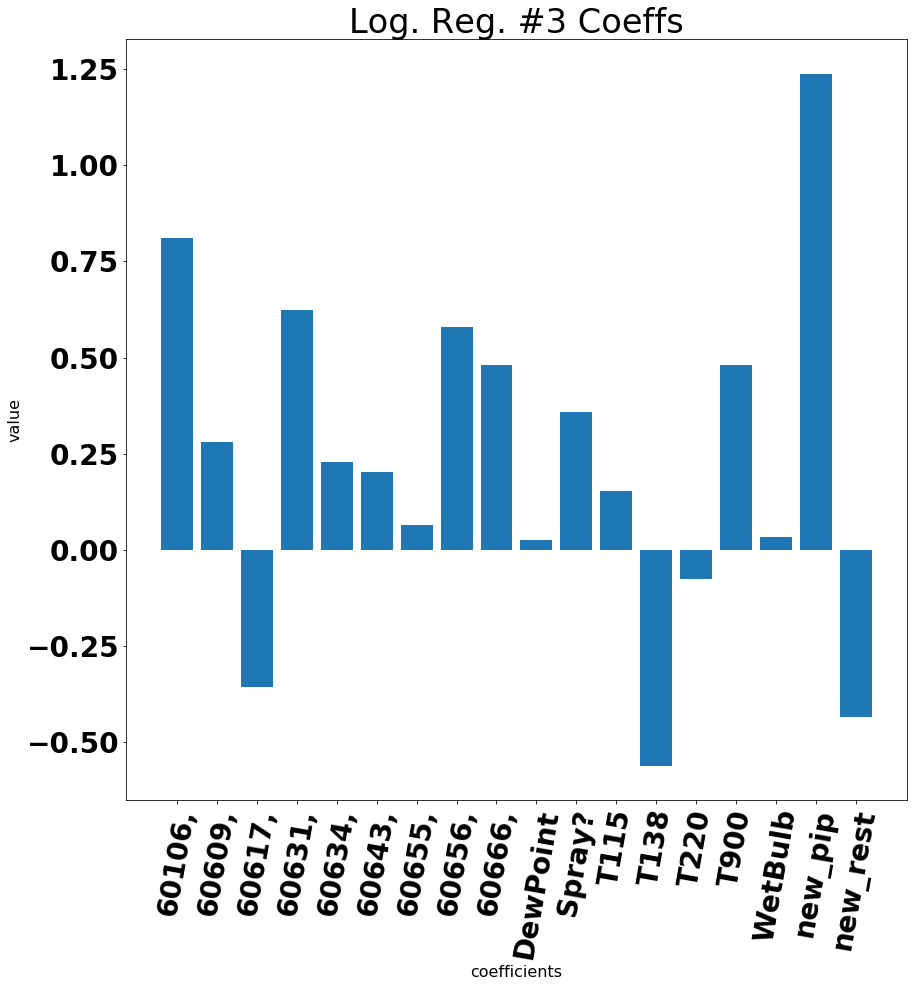

In [306]:
plt.figure(figsize = (14, 14))
plt.xticks(rotation = 80)
plt.xlabel('coefficients', fontsize = 16)
plt.ylabel('value', fontsize = 16)
plt.title('Log. Reg. #3 Coeff''s')

plt.bar(coefs.keys(), coefs.values())

font = {'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

## Logistic Regression #4

One of the features most highly correlated with the presence of West Nile was the number of mosquitos, which, for some reason, is not present in the test set. But it might be worth trying to add that column into the test set, perhaps based on some sort of aggregation over trap identities. Let's see what we can do.

In [307]:
train_mosq = pd.read_csv('Inputs/balancedTrainWithSpray.csv', low_memory = False)

In [502]:
corrs = train_mosq.drop('Unnamed: 0', axis = 1).corr()['WnvPresent']
corrs = abs(corrs)

In [558]:
train_mosq.drop('Unnamed: 0', axis = 1).corr()['WnvPresent']['LongRound']

-0.12606289123339573

In [504]:
corrs.nlargest(12)

WnvPresent      1.000000
NumMosquitos    0.388891
new_pip         0.263631
DewPoint        0.206022
WetBulb         0.196818
Tmin            0.167252
new_rest        0.163835
Tavg            0.156428
Tavg_int        0.156428
Heat            0.148063
Cool            0.133545
LongRound       0.126063
Name: WnvPresent, dtype: float64

In [553]:
corrsdf = pd.DataFrame(corrs.nlargest(12).drop(['WnvPresent', 'Tavg_int']))
corrsdf

,WnvPresent
NumMosquitos,0.388891
new_pip,0.263631
DewPoint,0.206022
WetBulb,0.196818
Tmin,0.167252
new_rest,0.163835
Tavg,0.156428
Heat,0.148063
Cool,0.133545
LongRound,0.126063


In [539]:
# This model is performing even better. Let's make plots boh of Pearson
# coefficients and of the new logistic regression coefficients.
import matplotlib.pyplot as plt

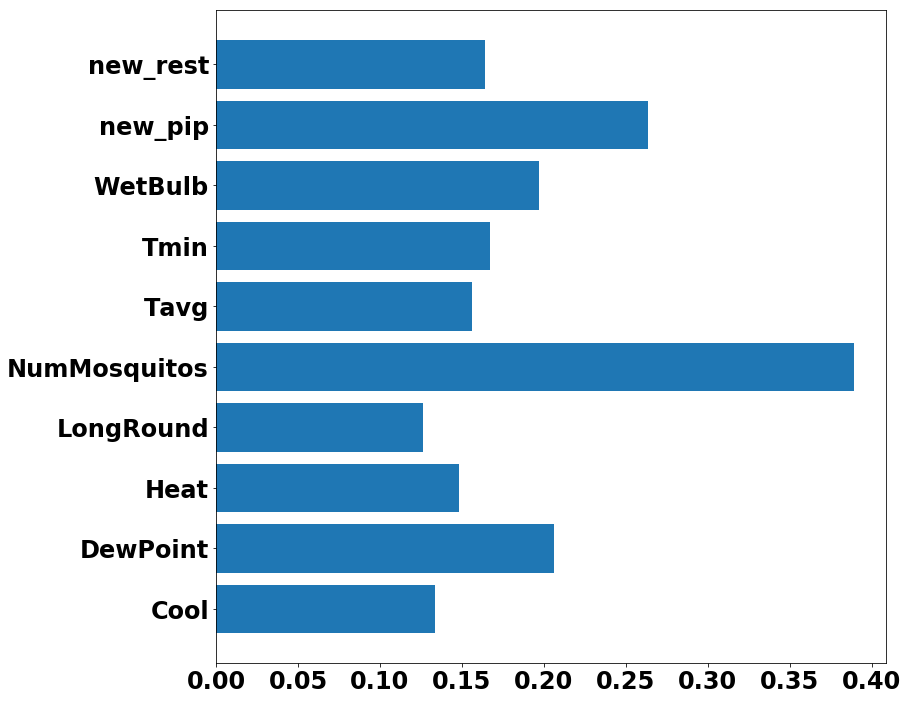

In [554]:
plt.figure(figsize = (12, 12))

plt.barh(corrsdf.index, corrsdf['WnvPresent'])

font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

Dmitry Efimov's highly successful team (https://www.kaggle.com/c/predict-west-nile-virus/discussion/14869) made use of the temperature stats, so let's add those in as well.

In [308]:
cols = ['60106,', '60609,', '60617,', '60631,', '60633,', '60634,', '60637,', '60643,',
        '60656,', '60666,',
       'Spray?', 'T115', 'T138', 'T900', 'new_pip', 'new_rest', 'Tmin', 'Tmax', 'Tavg',
       'NumMosquitos']
X = train_mosq[cols]
y = train_mosq['WnvPresent']

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

In [310]:
model6 = logreg.fit(X_train, y_train)

In [311]:
model6.score(X_test, y_test)

0.7292085174768983

In [312]:
coefs = dict(zip(cols, list(model6.coef_[0])))

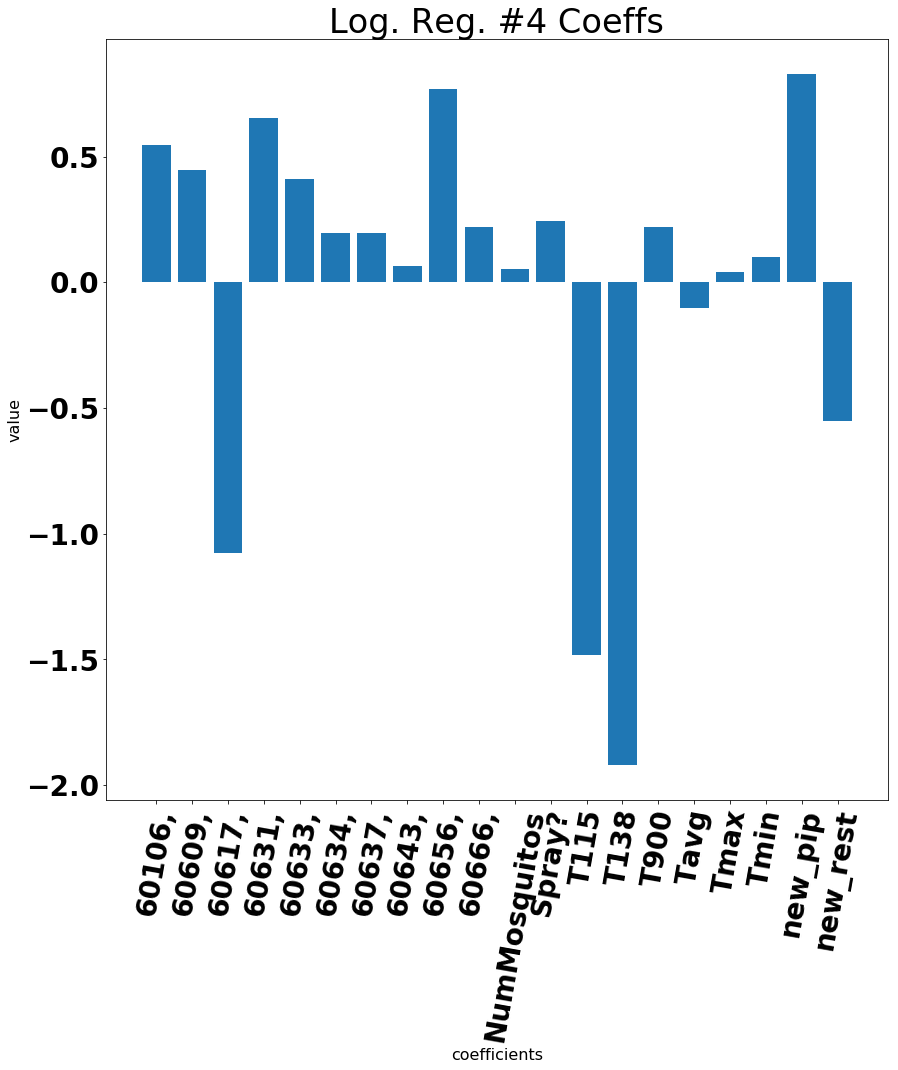

In [313]:
plt.figure(figsize = (14, 14))
plt.xticks(rotation = 80)
plt.xlabel('coefficients', fontsize = 16)
plt.ylabel('value', fontsize = 16)
plt.title('Log. Reg. #4 Coeff''s')

plt.bar(coefs.keys(), coefs.values())

font = {'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)

In [138]:
cols

['Date',
 'Address',
 'Species',
 'Block',
 'Street',
 'Trap',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'CULEX ERRATICUS',
 'CULEX PIPIENS',
 'CULEX PIPIENS/RESTUANS',
 'CULEX RESTUANS',
 'CULEX SALINARIUS',
 'CULEX TARSALIS',
 'CULEX TERRITANS',
 'UNSPECIFIED CULEX',
 'new_pip',
 'new_rest',
 'T001',
 'T002',
 'T002A',
 'T002B',
 'T003',
 'T004',
 'T005',
 'T006',
 'T007',
 'T008',
 'T009',
 'T011',
 'T012',
 'T013',
 'T014',
 'T015',
 'T016',
 'T017',
 'T018',
 'T019',
 'T025',
 'T027',
 'T028',
 'T030',
 'T031',
 'T033',
 'T034',
 'T035',
 'T036',
 'T037',
 'T039',
 'T040',
 'T043',
 'T044',
 'T045',
 'T046',
 'T047',
 'T048',
 'T049',
 'T050',
 'T051',
 'T054',
 'T054C',
 'T060',
 'T061',
 'T062',
 'T063',
 'T065',
 'T065A',
 'T066',
 'T067',
 'T069',
 'T070',
 'T071',
 'T072',
 'T073',
 'T074',
 'T075',
 'T076',
 'T077',
 'T078',
 'T079',
 'T080',
 'T081',
 'T082',
 'T083',
 'T084',
 'T085',
 'T086',
 'T088',
 'T089',
 'T090',
 'T090A',
 'T090B',


In [245]:
model6.coef_

array([[ 0.54382588,  0.44495976, -1.07851489,  0.65393747,  0.40927958,
         0.19432545,  0.19564955,  0.06314282,  0.76812558,  0.22039078,
         0.24494628, -1.48306342, -1.92228924,  0.22039078,  0.82975441,
        -0.55123725,  0.09933701,  0.03895466, -0.10177062,  0.05427302]])

### Collecting Data on NumMosquitos by Trap

The idea here is to collect data on ```NumMosquitos``` that we can then use to make predictions on the same for the test set (where ```NumMosquitos``` is conspicuously absent).

In [142]:
train_mosq['Trap'].value_counts().nlargest(10)

T900    1868
T115    1226
T138     603
T002     501
T003     338
T135     336
T128     324
T011     313
T903     306
T114     301
Name: Trap, dtype: int64

In [210]:
train_with_dums['NumMosquitos'].mean()

12.853512278697886

We recall here that the average number of mosquitos per observation in the original training set was 13. But we might like to know what the average was outside of our three favored traps.

In [212]:
train_traps.loc[(train_traps['Trap'] != 'T900') & (train_traps['Trap'] != 'T115') & (train_traps['Trap'] != 'T138')]['NumMosquitos'].mean()

9.89314606741573

#### Trap 900

In [145]:
train_mosq.loc[train_mosq['Trap'] == 'T900', 'NumMosquitos'].sum()

49423

In [146]:
train_mosq.loc[train_mosq['Trap'] == 'T900', 'new_pip'].sum()

1467

In [149]:
train_mosq.loc[(train_mosq['Trap'] == 'T900') & (train_mosq['Date'] < '2008'),
               'NumMosquitos'].sum()

0

T900 had 0 mosquitos in 2007.

In [150]:
train_mosq.loc[(train_mosq['Trap'] == 'T900') & (train_mosq['Date'] < '2010'),
               'NumMosquitos'].sum()

6318

T900 had 6318 mosquitos in 2009. We might therefore guess that it had 6318 / 2 = 3159 mosquitos in 2008.

In [151]:
train_mosq.loc[(train_mosq['Trap'] == 'T900') & (train_mosq['Date'] < '2012'),
               'NumMosquitos'].sum()

17055

T900 had 10737 mosquitos in 2011, and so 32368 mosquitos in 2013. We might therefore guess that it had (10737 + 6318) / 2 = 8527 mosquitos in 2010, that it had (32368 + 10737) / 2 = 21552 mosquitos in 2012, and that it had 32368 mosquitos in 2014.

In [159]:
train_mosq.loc[train_mosq['Trap'] == 'T900', 'ZIP'].value_counts()

60666,    1868
Name: ZIP, dtype: int64

In [348]:
test_weath['NumMosquitos'] = 10

In [248]:
test_weath.loc[(test_weath['Trap'] == 'T900') & (test_weath['Date'] < '2009')].shape[0]

322

In [349]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T900') & (test_weath['Date'] < '2009'), 3159 / 322, 10)

In [250]:
test_weath.loc[(test_weath['Trap'] == 'T900') & (test_weath['Date'] < '2011') & (test_weath['Date'] > '2009')].shape[0]

464

### Mistake!
#### Begin Interlude

I just realized (12 June) that I made a mistake in preparing the test set at this point. The next cell after this interlude overwrites the values of ```NumMosquitos``` that I just entered two cells above. I'm going to correct this here and now. Of course, the model may fare worse. (But I have to know.)

In [390]:
test_2008 = test_weath.loc[test_weath['Date'] < '2009', :]

In [387]:
test_2010 = test_weath.loc[(test_weath['Date'] < '2011') & (test_weath['Date'] > '2009'), :]

In [388]:
test_2012 = test_weath.loc[(test_weath['Date'] < '2013') & (test_weath['Date'] > '2011'), :]

In [389]:
test_2014 = test_weath.loc[test_weath['Date'] > '2013', :]

In [391]:
dict_2008 = {'T900': 3159 / 322, 'T115': 23478 / 209, 'T138': 11546 / 203}

In [392]:
dict_2010 = {'T900': 8527 / 464, 'T115': 1012 / 240, 'T138': 168 / 242}

In [393]:
dict_2012 = {'T900': 21552 / 372, 'T115': 3035 / 177, 'T138': 260 / 176}

In [394]:
dict_2014 = {'T900': 32368 / 310, 'T115': 4576 / 150, 'T138': 279 / 147}

In [396]:
test_2008['Trap'].replace(dict_2008, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [397]:
test_2010['Trap'].replace(dict_2010, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [398]:
test_2012['Trap'].replace(dict_2012, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [399]:
test_2014['Trap'].replace(dict_2014, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [400]:
test_weath = pd.concat([test_2008, test_2010, test_2012, test_2014])

#### End Interlude

In [350]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T900') & (test_weath['Date'] < '2011') & (test_weath['Date'] > '2009'), 8527 / 464, 10)

In [252]:
test_weath.loc[(test_weath['Trap'] == 'T900') & (test_weath['Date'] < '2013') & (test_weath['Date'] > '2011')].shape[0]

372

In [351]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T900') & (test_weath['Date'] < '2013') & (test_weath['Date'] > '2011'), 21552 / 372, 10)

In [254]:
test_weath.loc[(test_weath['Trap'] == 'T900') & (test_weath['Date'] > '2013')].shape[0]

310

In [352]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T900') & (test_weath['Date'] > '2013'), 32368 / 310, 10)

#### Trap 115

In [147]:
train_mosq.loc[train_mosq['Trap'] == 'T115', 'NumMosquitos'].sum()

53028

In [148]:
train_mosq.loc[train_mosq['Trap'] == 'T115', 'new_pip'].sum()

1175

In [155]:
train_mosq.loc[(train_mosq['Trap'] == 'T115') & (train_mosq['Date'] < '2008'),
               'NumMosquitos'].sum()

46428

T115 had 46428 mosquitos in 2007.

In [165]:
train_mosq.loc[(train_mosq['Trap'] == 'T115') & (train_mosq['Date'] < '2010'),
               'NumMosquitos'].sum()

46957

T115 had 529 mosquitos in 2009. We might therefore guess that it had (46428 + 529) / 2 = 23478 mosquitos in 2008.

In [166]:
train_mosq.loc[(train_mosq['Trap'] == 'T115') & (train_mosq['Date'] < '2012'),
               'NumMosquitos'].sum()

48452

T115 had 1495 mosquitos in 2011, and so 4576 mosquitos in 2013. We might therefore guess that it had (529 + 1495) / 2 = 1012 mosquitos in 2010, that it had (1495 + 4576) / 2 = 3035 mosquitos in 2012, and that it had 4576 mosquitos in 2014.

In [158]:
train_mosq.loc[train_mosq['Trap'] == 'T115', 'ZIP'].value_counts()

IL,    1226
Name: ZIP, dtype: int64

In [164]:
train_mosq.loc[train_mosq['Trap'] == 'T115', 'AddressNumberAndStreet'].value_counts()

1200  S DOTY AVE, Chicago, IL    1226
Name: AddressNumberAndStreet, dtype: int64

Perhaps the ZIP code is missing here because this address doesn't seem to exist. A look online suggests that the proper ZIP code would be 60633.

In [170]:
train_mosq.corr()['WnvPresent']['60633,']

0.03044564161747478

In [412]:
train_mosq.loc[train_mosq['Trap'] == 'T115', 'ZIP'] = '60633,'

test_weath.loc[test_weath['Trap'] == 'T115', 'ZIP'] = '60633,'

In [257]:
test_weath.loc[(test_weath['Trap'] == 'T115') & (test_weath['Date'] < '2009')].shape[0]

209

In [354]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T115') & (test_weath['Date'] < '2009'), 23478 / 209, 10)

In [259]:
test_weath.loc[(test_weath['Trap'] == 'T115') & (test_weath['Date'] < '2011') & (test_weath['Date'] > '2009')].shape[0]

240

In [355]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T115') & (test_weath['Date'] < '2011') & (test_weath['Date'] > '2009'), 1012 / 240, 10)

In [261]:
test_weath.loc[(test_weath['Trap'] == 'T115') & (test_weath['Date'] < '2013') & (test_weath['Date'] > '2011')].shape[0]

177

In [356]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T115') & (test_weath['Date'] < '2013') & (test_weath['Date'] > '2011'), 3035 / 177, 10)

In [263]:
test_weath.loc[(test_weath['Trap'] == 'T115') & (test_weath['Date'] > '2013')].shape[0]

150

In [357]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T115') & (test_weath['Date'] > '2013'), 4576 / 150, 10)

#### Trap 138

In [179]:
train_mosq.loc[train_mosq['Trap'] == 'T138', 'NumMosquitos'].sum()

23613

In [180]:
train_mosq.loc[train_mosq['Trap'] == 'T138', 'new_pip'].sum()

550

In [181]:
train_mosq.loc[(train_mosq['Trap'] == 'T138') & (train_mosq['Date'] < '2008'),
               'NumMosquitos'].sum()

22998

T138 had 22998 mosquitos in 2007.

In [182]:
train_mosq.loc[(train_mosq['Trap'] == 'T138') & (train_mosq['Date'] < '2010'),
               'NumMosquitos'].sum()

23092

T138 had 94 mosquitos in 2009. We might therefore guess that it had (22998 + 94) / 2 = 11546 mosquitos in 2008.

In [229]:
train_mosq.loc[(train_mosq['Trap'] == 'T138') & (train_mosq['Date'] < '2012'),
               'NumMosquitos'].sum()

23334

T138 had 242 mosquitos in 2011, and so therefore 279 mosquitos in 2013. We might therefore guess that it had (94 + 242) / 2 = 168 mosquitos in 2010, that it had (242 + 279) / 2 = 260 mosquitos in 2012, and that it had 279 mosquitos in 2014.

In [230]:
train_mosq.loc[train_mosq['Trap'] == 'T138', 'ZIP'].value_counts()

IL,    603
Name: ZIP, dtype: int64

In [231]:
train_mosq.loc[train_mosq['Trap'] == 'T138', 'AddressNumberAndStreet'].value_counts()

1000  S STONY ISLAND AVE, Chicago, IL    603
Name: AddressNumberAndStreet, dtype: int64

Again this seems to be a nonexistent address. The proper ZIP code for this street, however, seems to be 60637.

In [413]:
train_mosq.loc[train_mosq['Trap'] == 'T138', 'ZIP'] = '60637,'

test_weath.loc[test_zip['Trap'] == 'T138', 'ZIP'] = '60637,'

In [266]:
test_weath.loc[(test_weath['Trap'] == 'T138') & (test_weath['Date'] < '2009')].shape[0]

203

In [359]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T138') & (test_weath['Date'] < '2009'), 11546 / 203, 10)

In [268]:
test_weath.loc[(test_weath['Trap'] == 'T138') & (test_weath['Date'] < '2011') & (test_weath['Date'] > '2009')].shape[0]

242

In [360]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T138') & (test_weath['Date'] < '2011') & (test_weath['Date'] > '2009'), 168 / 242, 10)

In [270]:
test_weath.loc[(test_weath['Trap'] == 'T138') & (test_weath['Date'] < '2013') & (test_weath['Date'] > '2011')].shape[0]

176

In [361]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T138') & (test_weath['Date'] < '2013') & (test_weath['Date'] > '2011'), 260 / 176, 10)

In [272]:
test_weath.loc[(test_weath['Trap'] == 'T138') & (test_weath['Date'] > '2013')].shape[0]

147

In [362]:
test_weath['NumMosquitos'] = np.where((test_weath['Trap'] == 'T138') & (test_weath['Date'] > '2013'), 279 / 147, 10)

I added ZIP codes 60633 and 60637 to our model.

### Preparing the Test Set

In [414]:
zip_dums_t = pd.get_dummies(test_weath['ZIP'])

In [415]:
test_zip = pd.concat([test_weath, zip_dums], axis = 1)

In [416]:
test_zip['LatRound'] = round(test_zip['Latitude'], 2)

test_zip['LongRound'] = round(test_zip['Longitude'], 2)

lat_dums = pd.get_dummies(test_zip['LatRound'])

long_dums = pd.get_dummies(test_zip['LongRound'])

test_new_coords = pd.concat([test_zip, lat_dums, long_dums], axis = 1)


test_loc = []
for i in range(test_new_coords.shape[0]):
    test_loc.append((test_new_coords['LatRound'][i], test_new_coords['LongRound'][i]))

test_new_coords['loc'] = test_loc

test_loc = set(test_loc)

intersect = test_loc.intersection(spray_coords)

test_new_coords['Spray?'] = 0

In [417]:
sprays = []
for i in range(test_new_coords.shape[0]):
    if (test_new_coords['LatRound'][i], test_new_coords['LongRound'][i]) in intersect:
        sprays.append(1)
    else:
        sprays.append(0)

test_new_coords['Spray?'] = sprays

In [418]:
cols = ['60106,', '60609,', '60617,', '60631,', '60633,', '60634,', '60637,', '60643,', '60656,', '60666,',
       'Spray?', 'T115', 'T138', 'T900', 'new_pip', 'new_rest', 'Tmin', 'Tmax', 'Tavg',
       'NumMosquitos']

In [419]:
test_new_mdl = test_new_coords[cols]

In [420]:
mdl6_preds = model6.predict(test_new_mdl)

In [421]:
log_4_df = pd.DataFrame(mdl6_preds, columns = ['WnvPresent'])

In [422]:
test_sub = pd.concat([test_new_coords, log_4_df], axis = 1)

In [427]:
test_sub.loc[test_sub['WnvPresent'] == 1, 'ZIP'].value_counts()

60631,    1570
60656,    1416
60609,     767
60634,     757
IL,        707
60643,     514
60638,     408
60641,     354
60666,     348
60608,     306
60633,     276
60618,     253
60637,     248
60646,     220
60651,     215
60630,     211
60652,     204
60623,     204
60612,     193
60619,     184
60629,     183
60639,     177
60106,     162
60660,     146
60707,     144
60614,     105
60622,     105
60607,     103
60632,     102
60636,     102
60655,     102
60620,      95
60659,      80
60647,      71
60626,      70
60628,      51
60605,      51
60803,      51
60827,      51
60615,      51
60649,      51
60621,      51
60613,      35
60018,      35
60625,      35
60654,      35
60645,      35
60642,      35
60611,      35
60640,      35
Name: ZIP, dtype: int64

In [457]:
mdlpreds = pd.DataFrame(test_sub.loc[test_sub['WnvPresent'] == 1, 'ZIP'].value_counts())

In [461]:
mdlpreds.reset_index(inplace = True)

In [462]:
mdlpreds.columns = ['ZIP', 'Cases']

In [467]:
mdlpreds.drop(4, inplace = True)

In [472]:
mdlpreds['ZIP'] = mdlpreds['ZIP'].map(lambda x: x.replace(',', ''))

In [473]:
mdlpreds.to_csv('Inputs/modelPredictsAllZIP.csv')

In [423]:
preds_zips = test_sub[['60106,', '60609,', '60617,', '60631,', '60633,', '60634,', '60637,',
         '60643,', '60656,', '60666,', 'WnvPresent']]

In [375]:
preds_zips.loc[preds_zips['WnvPresent'] == 1].sum()

60106,          162
60609,          767
60617,            0
60631,         1570
60633,          276
60634,          757
60637,          248
60643,          514
60656,         1416
60666,          348
WnvPresent    11739
dtype: int64

In [424]:
# second try
preds_zips.loc[preds_zips['WnvPresent'] == 1].sum()

60106,          162
60609,          767
60617,            0
60631,         1570
60633,          276
60634,          757
60637,          248
60643,          514
60656,         1416
60666,          348
WnvPresent    11739
dtype: int64

In [382]:
predsByZIP = pd.DataFrame([[60106, 162], [60609, 767], [60631, 1570], [60633, 276],
                          [60634, 757], [60637, 248], [60643, 514], [60656, 1416],
                           [60666, 348]], columns = ['ZIP', 'WN_Cases_Predicted'])
predsByZIP

,ZIP,WN_Cases_Predicted
0,60106,162
1,60609,767
2,60631,1570
3,60633,276
4,60634,757
5,60637,248
6,60643,514
7,60656,1416
8,60666,348


In [383]:
predsByZIP.to_csv('Inputs/modelPredictsByZIP.csv')

In [287]:
test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-7.csv', index = False)

This model scored significantly better on my homegrown test set but no better on Kaggle. (Admittedly, we're talking about two different metrics here, but I still think my conclusions are reasonable.) I'm inclined to believe that I did a poor job in estimating the number of mosquitos in the test set. And we only made adjustments to three traps, after all. Perhaps we can generalize our strategy from the previous model to all traps.

## Logistic Regression ##5-6

In [296]:
train_mosq['Trap'].values[0]

'T002'

In [304]:
# Begin the fancy procedure to get a (reasonable) estimate of the number
# of mosquitos into the test set. First I'm going to construct quadruples
# of the numbers per year by trap (as we did before for the three traps
# we singled out).

train_mosqs = []
for trap in train_mosq['Trap'].values:
    train_mosqs.append((train_mosq.loc[(train_mosq['Trap'] == trap) &
                (train_mosq['Date'] < '2008'), 'NumMosquitos'].sum(),
                train_mosq.loc[(train_mosq['Trap'] == trap) & (train_mosq['Date'] < '2010')
                               & (train_mosq['Date'] > '2008'), 'NumMosquitos'].sum(),
                train_mosq.loc[(train_mosq['Trap'] == trap) & (train_mosq['Date'] < '2012')
                               & (train_mosq['Date'] > '2010'), 'NumMosquitos'].sum(),
                train_mosq.loc[(train_mosq['Trap'] == trap) &
                               (train_mosq['Date'] > '2012'), 'NumMosquitos'].sum()))

In [307]:
train_mosq_dict = dict(zip(train_mosq['Trap'].values, train_mosqs))

In [309]:
# The next move is to use these to make estimates for the missing years:
# 2008, 2010, 2012, and 2014.

mosq_2008 = []
for quad in train_mosqs:
    mosq_2008.append((quad[0] + quad[1]) / 2)

mosq_2010 = []
for quad in train_mosqs:
    mosq_2010.append((quad[1] + quad[2]) / 2)

mosq_2012 = []
for quad in train_mosqs:
    mosq_2012.append((quad[2] + quad[3]) / 2)

mosq_2014 = []
for quad in train_mosqs:
    mosq_2014.append(quad[3])

In [315]:
# Then turn these into dictionaries.

dict_2008 = dict(zip(train_mosq['Trap'].values, mosq_2008))

dict_2010 = dict(zip(train_mosq['Trap'].values, mosq_2010))

dict_2012 = dict(zip(train_mosq['Trap'].values, mosq_2012))

dict_2014 = dict(zip(train_mosq['Trap'].values, mosq_2014))

In [323]:
# Finally, use these dictionaries to replace the 'Trap' values in the
# test set. (Of course, we've now got the number of mosquitos estimate
# called 'Trap', but that doesn't really matter. Traps have already been
# dummied out, so the 'Trap' column doesn't matter anyway.)

test_new_coords_2008 = test_new_coords.loc[test_new_coords['Date'] < '2009']

test_new_coords_2008['Trap'].replace(dict_2008, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [324]:
test_new_coords_2010 = test_new_coords.loc[(test_new_coords['Date'] < '2011') &
                                          (test_new_coords['Date'] > '2009')]

test_new_coords_2010['Trap'].replace(dict_2010, inplace = True)

In [326]:
test_new_coords_2012 = test_new_coords.loc[(test_new_coords['Date'] < '2013') &
                                          (test_new_coords['Date'] > '2011')]

test_new_coords_2012['Trap'].replace(dict_2012, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [327]:
test_new_coords_2014 = test_new_coords.loc[test_new_coords['Date'] > '2013']

test_new_coords_2014['Trap'].replace(dict_2014, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [419]:
test_new_coords = pd.concat([test_new_coords_2008, test_new_coords_2010, test_new_coords_2012,
                            test_new_coords_2014])

# Let's rename the 'Trap' column appropriately.

test_new_coords.drop(columns = ['NumMosquitos'], inplace = True)

test_new_coords['NumMosquitos'] = test_new_coords['Trap']

In [111]:
# We'll write a function to give a baseline value for 'NumMosquitos' in
# the test set.

def zero(x):
    if type(x) == str:
        x = 0
    return x

Perhaps we should try setting the leftovers to 10 instead?

In [350]:
test_new_coords['NumMosquitos'] = test_new_coords['NumMosquitos'].map(lambda x: zero(x))

In [352]:
test_smarter = test_new_coords[cols]

mdl7 = model6.predict(test_smarter)

log_5_df = pd.DataFrame(mdl7, columns = ['WnvPresent'])

In [353]:
log_5_df = pd.DataFrame(mdl7, columns = ['WnvPresent'])

In [354]:
test_sub = pd.concat([test_new_coords, log_5_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-7.csv', index = False)

In [355]:
log_5_df['WnvPresent'].value_counts()

1    67206
0    49087
Name: WnvPresent, dtype: int64

This is almost certainly way too many predictions of West Nile. First let's make sure the problem is not with our ```zero``` function.

In [356]:
def mean(x):
    if x == 10:
        x = 0
    return x

In [357]:
test_new_coords['NumMosquitos'] = test_new_coords['NumMosquitos'].map(lambda x: mean(x))

In [358]:
test_smarter = test_new_coords[cols]

mdl8 = model6.predict(test_smarter)

log_6_df = pd.DataFrame(mdl8, columns = ['WnvPresent'])

In [359]:
test_sub = pd.concat([test_new_coords, log_6_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-8.csv', index = False)

Not so surprisingly, this was even worse. Probably we have too many mosquitos, rather than too few.

## Logistic Regression #7

Let's reset our ```NumMosquitos``` column. Since we now have too _many_ predictions of West Nile, we probably need to include more features correlated with _lack_ of West Nile, like the species that don't seem to carry it and the less active ZIP codes.

In [360]:
test_new_coords['NumMosquitos'] = test_new_coords['Trap']

In [422]:
test_new_coords['NumMosquitos'] = test_new_coords['NumMosquitos'].map(lambda x: zero(x))

Let's now add in all the ZIP dummies.

In [416]:
zip_cols = [col for col in list(test_new_coords.columns) if ',' in str(col)]

In [417]:
zip_cols.extend(['Spray?', 'T115', 'T138', 'T900', 'new_pip', 'new_rest',
                        'CULEX ERRATICUS', 'CULEX TERRITANS', 'CULEX SALINARIUS',
                        'CULEX TARSALIS', 'Tmin', 'Tmax', 'Tavg', 'NumMosquitos'])

In [412]:
X = train_mosq[zip_cols]
X.drop(columns = 'IL,', inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [413]:
logreg = LogisticRegression()
mdl9 = logreg.fit(X, y)

In [427]:
test_9 = test_new_coords[zip_cols]
test_9.drop(columns = 'IL,', inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [428]:
mdl9 = logreg.predict(test_9)

In [429]:
log_7_df = pd.DataFrame(mdl9, columns = ['WnvPresent'])

In [430]:
test_sub = pd.concat([test_new_coords, log_7_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-9.csv', index = False)

Kaggle Score: 0.516.

## Logistic Regression #8

Let's take the columns from our most successful model with the five largest coefficients in absolute value: ```60617,```, ```60656,```, ```T115```, ```T138```, and ```new_pip```.

In [432]:
small_cols = ['60617,', '60656,', 'T115', 'T138', 'new_pip']

In [433]:
X = train_mosq[small_cols]
mdl10 = logreg.fit(X, y)

In [435]:
test10 = test_new_coords[small_cols]
mdl10_pred = mdl10.predict(test10)

In [437]:
log_8_df = pd.DataFrame(mdl10_pred, columns = ['WnvPresent'])

In [438]:
test_sub = pd.concat([test_new_coords, log_8_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-10.csv', index = False)

Kaggle Score: 0.605.

## Logistic Regression #9

In [449]:
less_small_cols = ['60617,', '60656,', 'T115', 'T138', 'new_pip', '60631,',
                   'new_rest', '60106,']

In [450]:
X = train_mosq[less_small_cols]
mdl11 = logreg.fit(X, y)

test11 = test_new_coords[less_small_cols]
mdl11_pred = mdl11.predict(test11)

log_9_df = pd.DataFrame(mdl11_pred, columns = ['WnvPresent'])

In [453]:
test_sub = pd.concat([test_new_coords, log_9_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-11.csv', index = False)

Kaggle Score: 0.595.

## Logistic Regression #10

Is less more?

In [455]:
smaller_cols = ['60617,', 'T115', 'T138']

In [456]:
X = train_mosq[smaller_cols]
mdl12 = logreg.fit(X, y)

test12 = test_new_coords[smaller_cols]
mdl12_pred = mdl12.predict(test12)

log_10_df = pd.DataFrame(mdl12_pred, columns = ['WnvPresent'])

In [457]:
test_sub = pd.concat([test_new_coords, log_10_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-12.csv', index = False)

Kaggle Score: 0.490. (Or, I guess, 0.510, if we reverse the predictions.)

## Logistic Regression #11

I want to try to add in more weather data. I think I might also put back in ```NumMosquitos``` because (a) I worked really hard on getting this into the test set and (b) I'm stubborn.

In [458]:
train_mosq.columns

Index(['Unnamed: 0', 'Address', 'AddressAccuracy', 'AddressNumberAndStreet',
       'AvgSpeed', 'Block', 'CULEX ERRATICUS', 'CULEX SALINARIUS',
       'CULEX TARSALIS', 'CULEX TERRITANS',
       ...
       '-87.61', '-87.6', '-87.59', '-87.58', '-87.57', '-87.56', '-87.55',
       '-87.54', '-87.53', 'loc'],
      dtype='object', length=303)

A similar study (https://www.ncbi.nlm.nih.gov/pubmed/21485391) showed that the presence of WNV depended significantly on precipitation totals over the previous 35 days.

In [467]:
weather.loc[weather['Date'] < '2014', :].tail()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2571,2,2013-10-29,57,43,50,M,39,45,15,0,...,RA HZ,M,M,M,T,29.57,30.26,5.9,11,6.6
2572,1,2013-10-30,63,43,53,7,52,53,12,0,...,RA BR HZ,0,M,0.0,0.55,29.22,30.00,6.6,15,7.5
2573,2,2013-10-30,64,47,56,M,52,53,9,0,...,RA BR HZ,M,M,M,1.16,29.29,30.01,5.3,14,6.2
2574,1,2013-10-31,64,46,55,9,56,57,10,0,...,RA BR,0,M,0.0,1.04,28.69,29.45,9.4,24,11.5
2575,2,2013-10-31,65,47,56,M,56,57,9,0,...,RA BR,M,M,M,2.03,28.77,29.47,9.5,23,11.4


In [37]:
weather['PrecipTotal'] = weather['PrecipTotal'].replace('  T', 0)

In [38]:
weather['PrecipTotal'] = weather['PrecipTotal'].replace('M', 0)

In [39]:
weather['PrecipTotal'] = weather['PrecipTotal'].astype(float)

In [26]:
# weather['35d_precip'] = 0

These ways to aggregate precipitation totals also required too much computation time. ```.rolling()``` to the rescue!

In [6]:
# def precip_35(x):
  #   for i in range(35, len(x)):
    #     for j in range(36):
      #       x[i] += x[35 + i - j]
    # return x

In [7]:
# precip_35(weather['PrecipTotal'])

In [8]:
# for i in range(35, weather.shape[0]):
  #   for j in range(36):
    #     weather['30d_precip'][i] += weather['PrecipTotal'][35 + i - j]

In [41]:
weather['PrecipTotal'] = weather.rolling(window = 36, on = 'PrecipTotal').sum()
weather['Tmin'] = weather.rolling(window = 12, on = 'Tmin').mean()

In [56]:
train_weath = pd.merge(train_traps, weather, how = 'left', on = ['Date', 'Station'])

In [71]:
zip_dums = pd.get_dummies(train_weath['ZIP'])

In [72]:
train_zip = pd.concat([train_weath, zip_dums], axis = 1)

In [78]:
from sklearn.utils import resample

In [79]:
train_zip_maj = train_zip[train_zip['WnvPresent'] == 0]
train_zip_min = train_zip[train_zip['WnvPresent'] == 1]

min_upsampled = resample(train_zip_min, replace = True, n_samples = 9955, random_state = 42)

In [80]:
X_new = pd.concat([train_zip_maj, min_upsampled])
y_new = X_new['WnvPresent']

In [115]:
trainAdjWeath = pd.concat([X_new, y_new], axis = 1)

In [116]:
trainAdjWeath.to_csv('Inputs/trainBalancedAdjWeath.csv')

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
eleven_cols = ['60617,', '60656,', '60666,', 'T115', 'T138', 'new_pip', 'NumMosquitos',
               'PrecipTotal', 'Tmin']
X = X_new[eleven_cols]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, stratify = y_new,
                                                    random_state = 42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
mdl13 = logreg.fit(X_train, y_train)

In [93]:
logreg.score(X_test, y_test)

0.7257934913619928

In [94]:
spec_dums_t = pd.get_dummies(test['Species'])

test_with_dums = pd.concat([test, spec_dums_t], axis = 1)

test_with_dums['new_pip'] = test_with_dums['CULEX PIPIENS'] + test_with_dums['CULEX PIPIENS/RESTUANS']

test_with_dums['new_rest'] = test_with_dums['CULEX RESTUANS'] + test_with_dums['CULEX PIPIENS/RESTUANS']

test_dums_t = pd.get_dummies(test_with_dums['Trap'])

test_traps = pd.concat([test_with_dums, test_dums_t], axis = 1)

test_traps['Date'] = pd.to_datetime(test_traps['Date'])

test_traps['Station'] = np.where((test_traps['Latitude'] - ord_lat) ** 2 + (np.cos(np.pi / 180 * test_traps['Latitude']) * (test_traps['Longitude'] - ord_long)) ** 2 < (test_traps['Latitude'] - mdw_lat) ** 2 + (np.cos(np.pi / 180 * test_traps['Latitude']) * (test_traps['Longitude'] - ord_long)) ** 2, 1, 2)

test_weath = pd.merge(test_traps, weather, how = 'left', on = ['Date', 'Station'])

test_weath['Tavg_int'] = test_weath['Tavg'].map(lambda x: int(x), na_action = 'ignore')

In [95]:
add_list = [add.split(' ') for add in test_weath['Address']]

test_weath['ZIP'] = [item[-2] for item in add_list]

zip_dums = pd.get_dummies(test_weath['ZIP'])

test_zip = pd.concat([test_weath, zip_dums], axis = 1)

In [99]:
train_mosqs = []
for trap in X_new['Trap'].values:
    train_mosqs.append((X_new.loc[(X_new['Trap'] == trap) & (X_new['Date'] < '2008'),
                   'NumMosquitos'].sum(), X_new.loc[(X_new['Trap'] == trap) &
                                                           (X_new['Date'] < '2010') &
                                                           (X_new['Date'] > '2008'),
                   'NumMosquitos'].sum(), X_new.loc[(X_new['Trap'] == trap) &
                                                           (X_new['Date'] < '2012') &
                                                           (X_new['Date'] > '2010'),
                   'NumMosquitos'].sum(), X_new.loc[(X_new['Trap'] == trap) &
                                                           (X_new['Date'] > '2012'),
                   'NumMosquitos'].sum()))

In [101]:
train_mosq_dict = dict(zip(X_new['Trap'].values, train_mosqs))

In [102]:
mosq_2008 = []
for quad in train_mosqs:
    mosq_2008.append((quad[0] + quad[1]) / 2)

mosq_2010 = []
for quad in train_mosqs:
    mosq_2010.append((quad[1] + quad[2]) / 2)

mosq_2012 = []
for quad in train_mosqs:
    mosq_2012.append((quad[2] + quad[3]) / 2)

mosq_2014 = []
for quad in train_mosqs:
    mosq_2014.append(quad[3])

In [103]:
dict_2008 = dict(zip(X_new['Trap'].values, mosq_2008))

dict_2010 = dict(zip(X_new['Trap'].values, mosq_2010))

dict_2012 = dict(zip(X_new['Trap'].values, mosq_2012))

dict_2014 = dict(zip(X_new['Trap'].values, mosq_2014))

In [104]:
test_new_coords_2008 = test_zip.loc[test_zip['Date'] < '2009']

test_new_coords_2008['Trap'].replace(dict_2008, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [105]:
test_new_coords_2010 = test_zip.loc[(test_zip['Date'] < '2011') &
                                          (test_zip['Date'] > '2009')]

test_new_coords_2010['Trap'].replace(dict_2010, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [106]:
test_new_coords_2012 = test_zip.loc[(test_zip['Date'] < '2013') &
                                          (test_zip['Date'] > '2011')]

test_new_coords_2012['Trap'].replace(dict_2012, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [107]:
test_new_coords_2014 = test_zip.loc[test_zip['Date'] > '2013']

test_new_coords_2014['Trap'].replace(dict_2014, inplace = True)

/Users/gadamico/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [109]:
test_new_coords = pd.concat([test_new_coords_2008, test_new_coords_2010, test_new_coords_2012,
                            test_new_coords_2014])

test_new_coords['NumMosquitos'] = test_new_coords['Trap']

test_new_coords['NumMosquitos'] = test_new_coords['NumMosquitos'].map(lambda x: zero(x))

In [114]:
# Let's keep this for future use.
test_new_coords.to_csv('Inputs/testAdjWeath.csv')

In [119]:
test_mdl13 = ss.transform(test_new_coords[eleven_cols])

In [120]:
mdl13_pred = mdl13.predict(test_mdl13)

log_11_df = pd.DataFrame(mdl13_pred, columns = ['WnvPresent'])

In [121]:
test_sub = pd.concat([test_new_coords, log_11_df], axis = 1)

test_cols = [col for col in test_sub.columns if (col == 'Id') | (col == 'WnvPresent')]

test_submission = test_sub[test_cols]

test_submission.to_csv('Outputs/ta-13.csv', index = False)

Kaggle Score: 0.512. Well, that's disappointing. Perhaps Chris's SVMs or DJ's CNNs will perform better.